In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
#import sklearn as sk

import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

mpl.rc('figure', figsize=(8, 5))
mpl.rc('figure', dpi=300)

# 그레디언트 소멸 문제

In [2]:
from keras.datasets import mnist
from keras.utils import np_utils

(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

X_train = X_train0.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test0.reshape(10000, 784).astype('float32') / 255.0
Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)

In [3]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

In [4]:
model1 = Sequential()
model1.add(Dense(15, input_dim=784, activation="sigmoid"))
model1.add(Dense(10, activation="sigmoid"))
model1.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=["accuracy"])

In [5]:
model2 = Sequential()
model2.add(Dense(15, input_dim=784, activation="sigmoid"))
model2.add(Dense(15, activation="sigmoid"))
model2.add(Dense(10, activation="sigmoid"))
model2.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=["accuracy"])

In [6]:
model3 = Sequential()
model3.add(Dense(15, input_dim=784, activation="sigmoid"))
model3.add(Dense(15, activation="sigmoid"))
model3.add(Dense(15, activation="sigmoid"))
model3.add(Dense(10, activation="sigmoid"))
model3.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=["accuracy"])

In [7]:
model4 = Sequential()
model4.add(Dense(15, input_dim=784, activation="sigmoid"))
model4.add(Dense(15, activation="sigmoid"))
model4.add(Dense(15, activation="sigmoid"))
model4.add(Dense(15, activation="sigmoid"))
model4.add(Dense(10, activation="sigmoid"))
model4.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=["accuracy"])

In [8]:
from keras.callbacks import Callback

class WeightHistory(Callback):
    
    def __init__(self, model, num_epoch):
        super().__init__()
        self.model = model
        self.num_hidden = len(model.layers) - 1
        self.weight_old = [self.model.layers[i].get_weights()[0] for i in range(self.num_hidden)]
        self.weight = [0.0 for i in range(self.num_hidden)]
        self.weight_change = np.zeros((self.num_hidden, num_epoch))
        
    def on_epoch_end(self, epoch, logs={}):
        for i in range(self.num_hidden):
            self.weight[i] = self.model.layers[i].get_weights()[0]
            self.weight_change[i, epoch] = np.abs((self.weight[i] - self.weight_old[i]).mean())
            self.weight_old[i] = self.weight[i]
            

In [9]:
num_epoch = 500

In [10]:
%%time
callback1 = WeightHistory(model1, num_epoch)
hist1 = model1.fit(X_train, Y_train, epochs=num_epoch, batch_size=100, callbacks=[callback1], verbose=0)

CPU times: user 40min 55s, sys: 1h 1min 9s, total: 1h 42min 5s
Wall time: 34min 10s


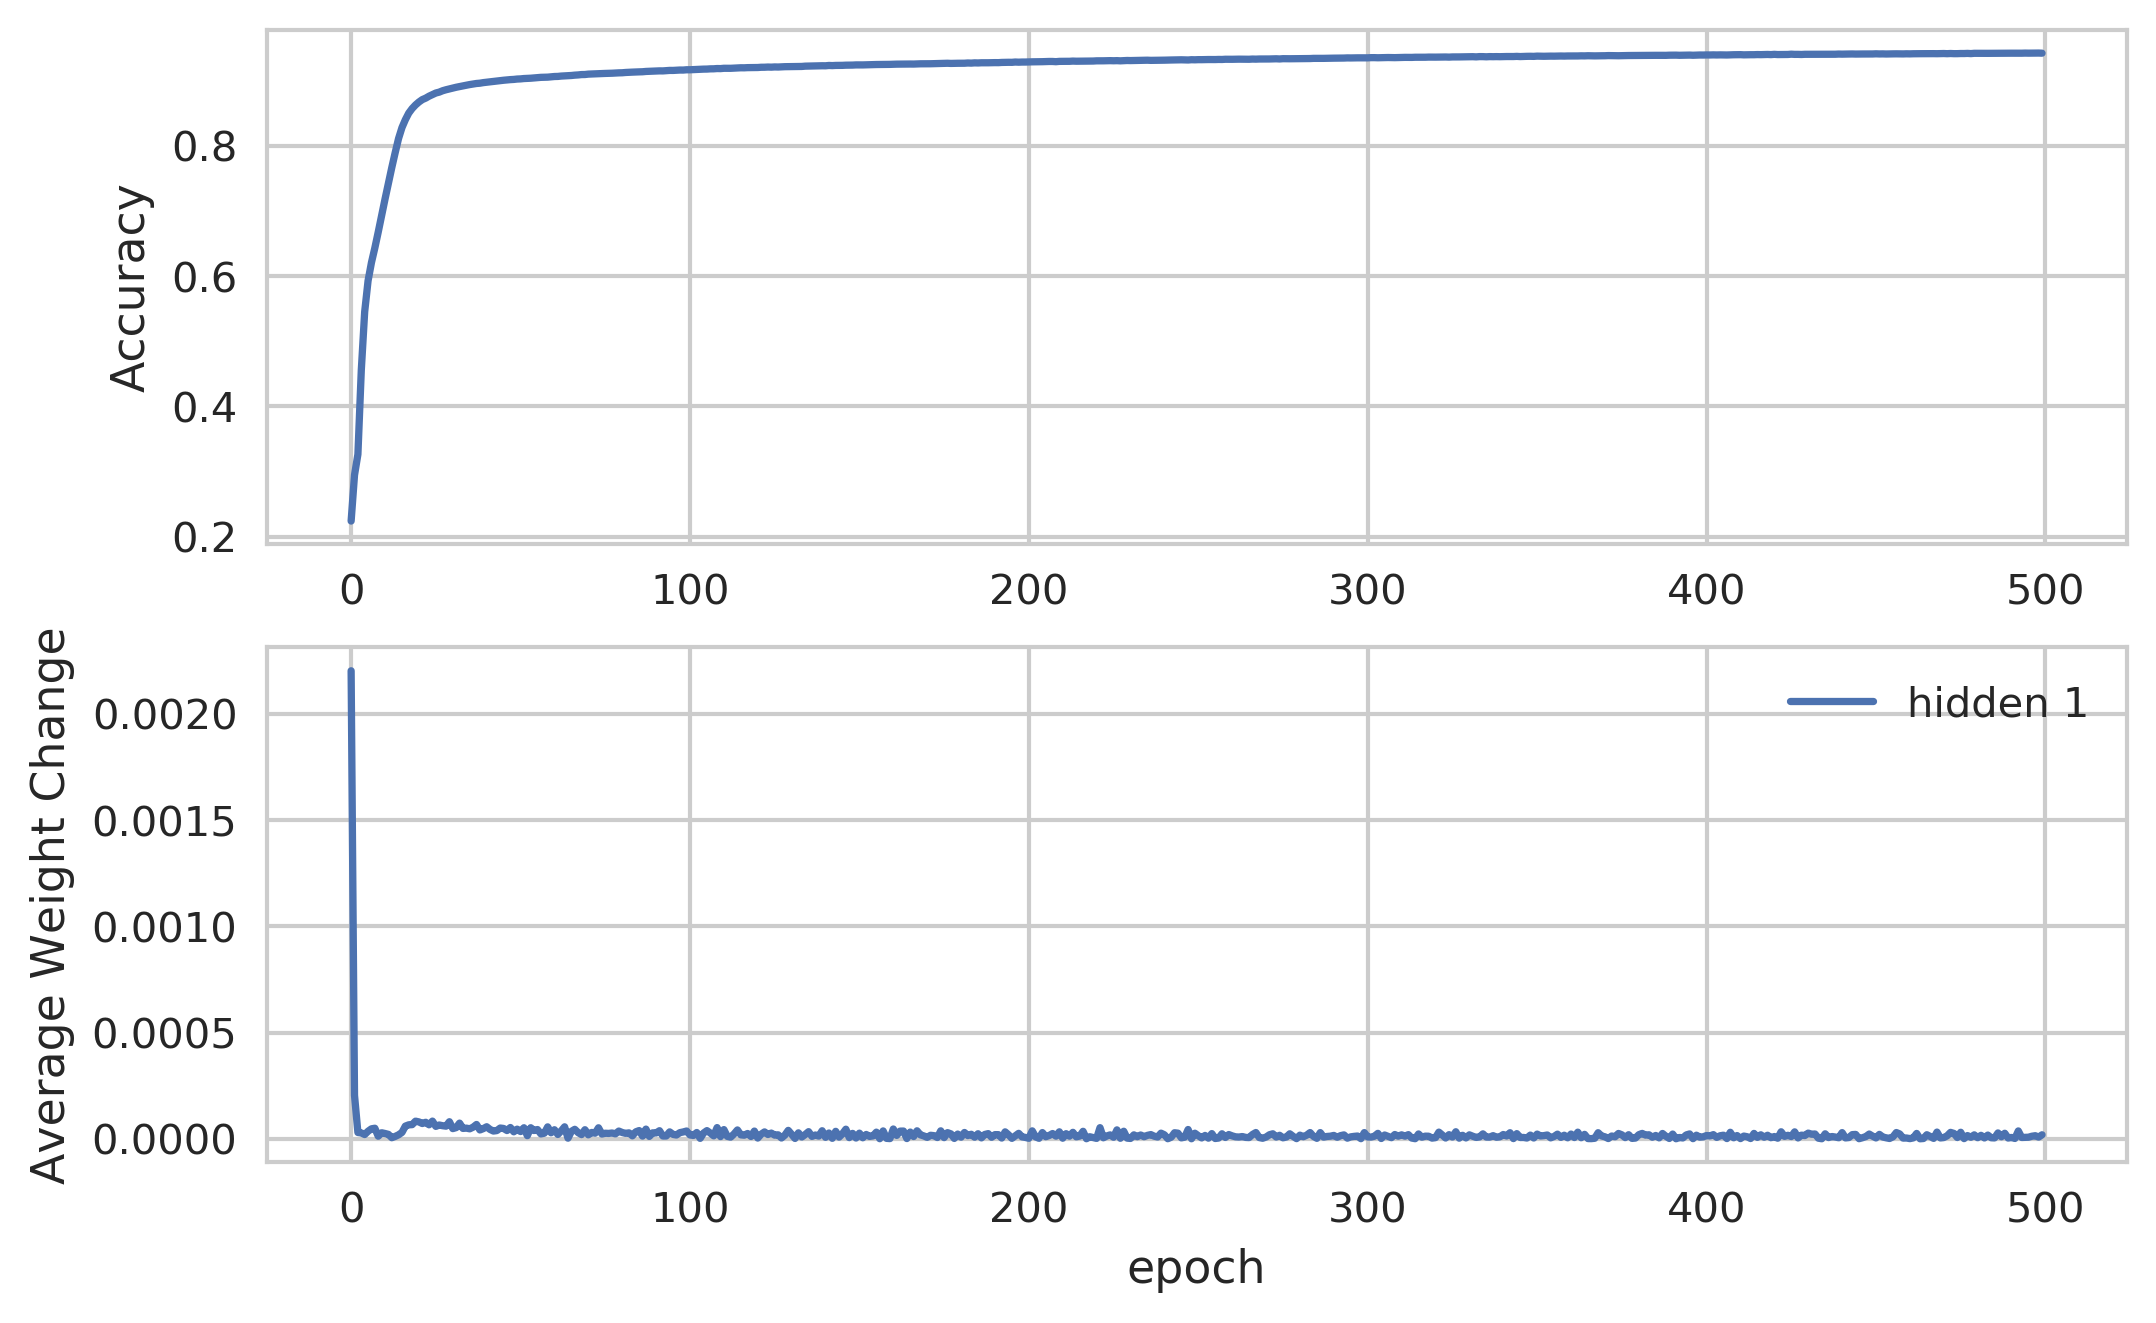

In [82]:
plt.subplot(2, 1, 1)
plt.plot(hist1.history['acc'])
plt.ylabel("Accuracy")
plt.subplot(2, 1, 2)
plt.plot(callback1.weight_change[0], label="hidden 1")
plt.xlabel("epoch")
plt.ylabel("Average Weight Change")
plt.legend()
plt.show()

In [99]:
hist1.history['acc'][-1]

0.942866667509079

In [83]:
%%time
callback2 = WeightHistory(model2, num_epoch)
hist2 = model2.fit(X_train, Y_train, epochs=num_epoch, batch_size=100, callbacks=[callback2], verbose=0)

CPU times: user 28min 35s, sys: 2min 42s, total: 31min 17s
Wall time: 14min 57s


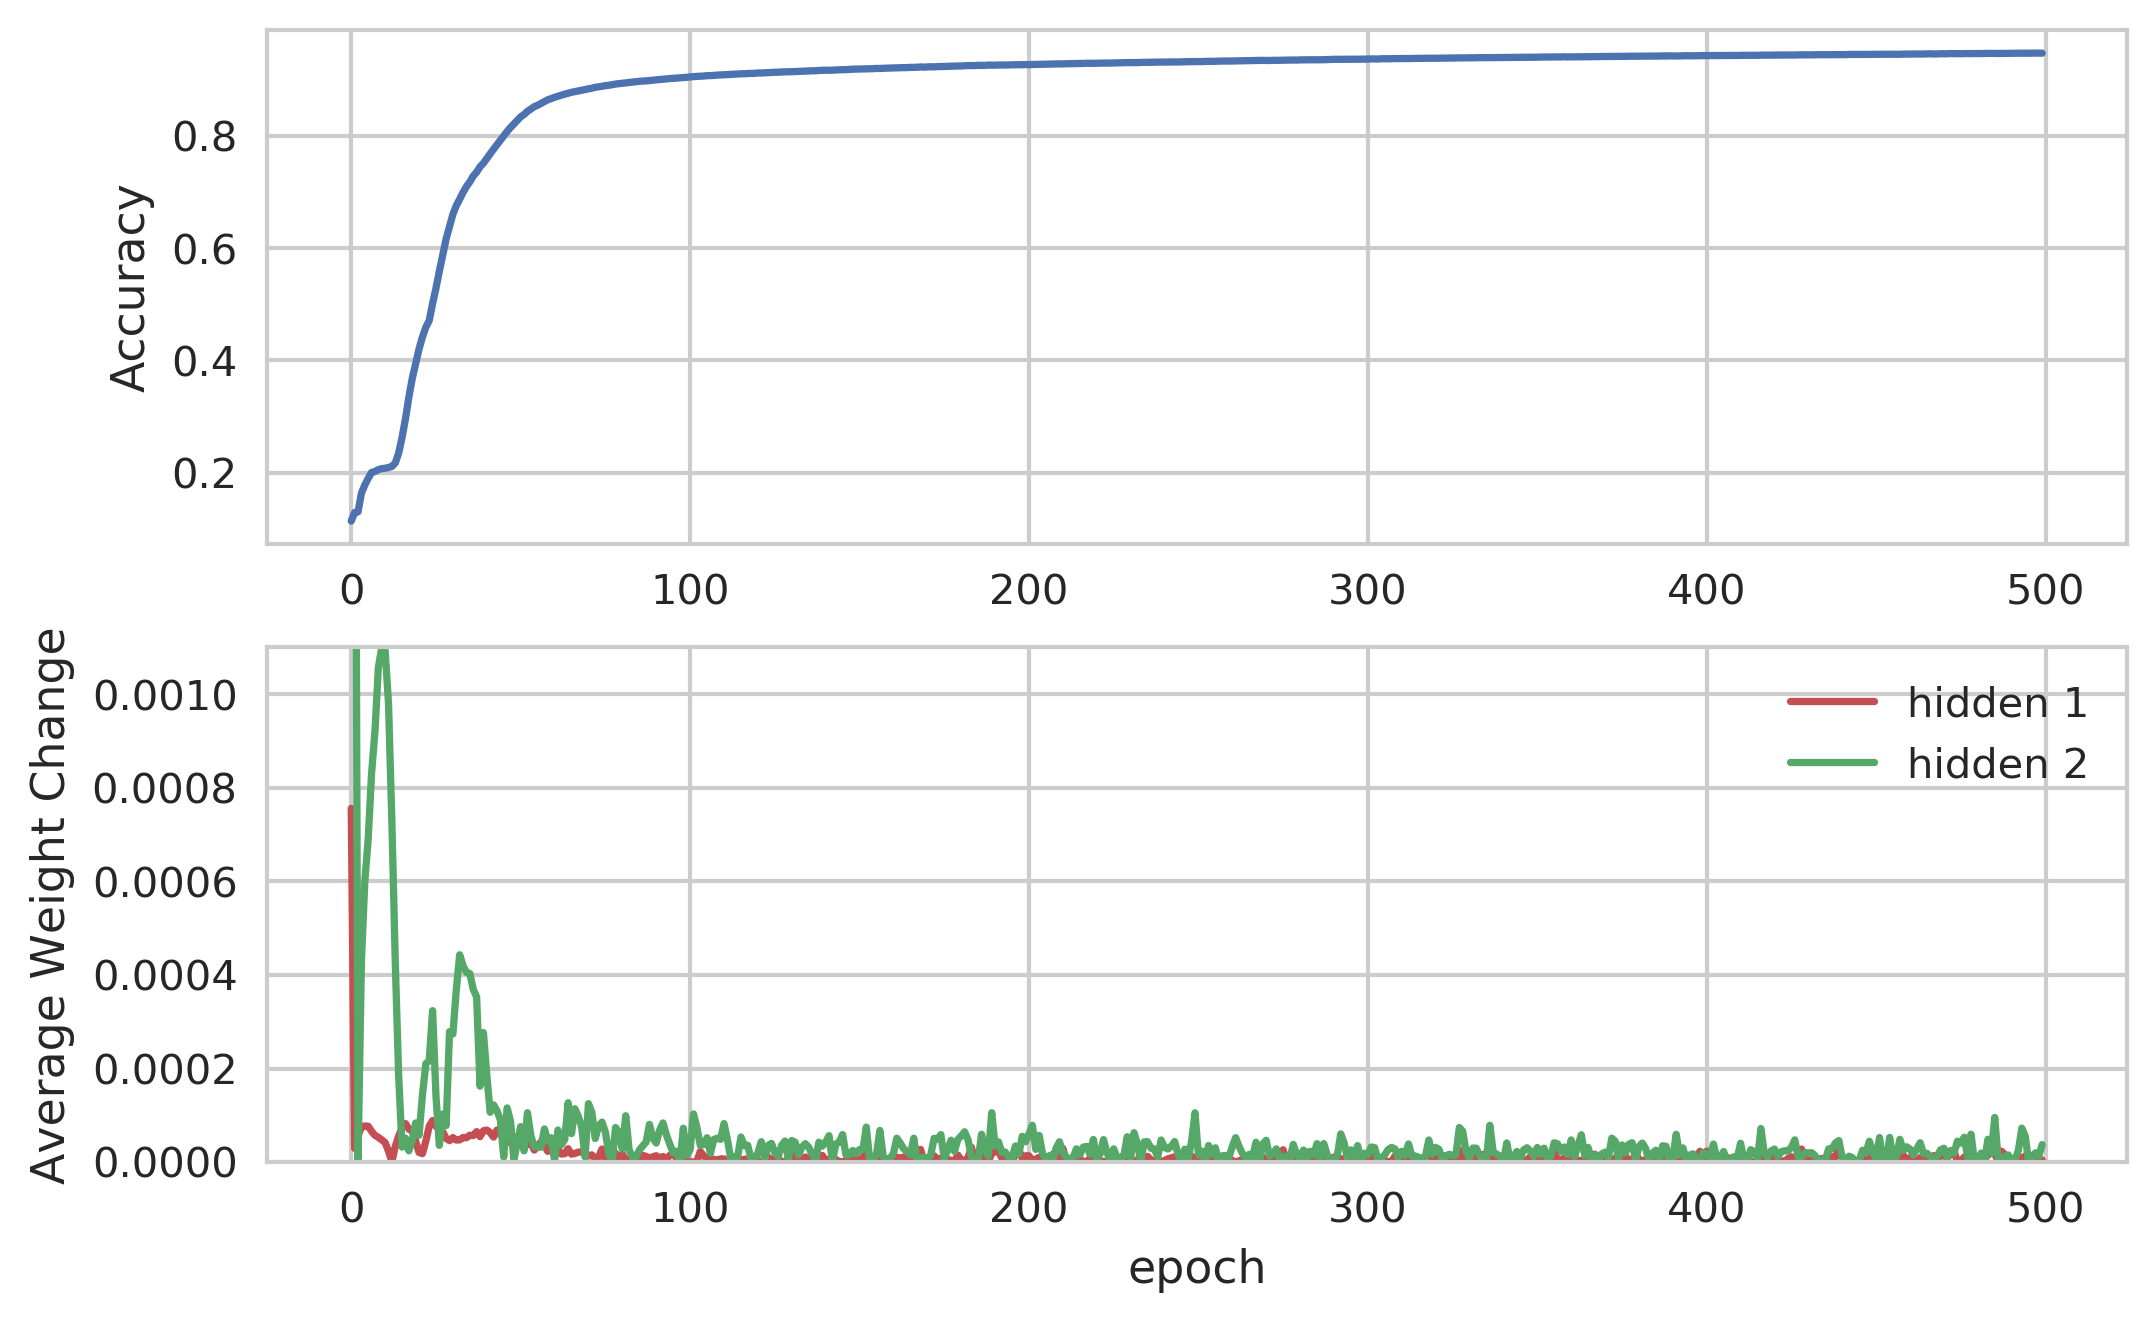

In [84]:
plt.subplot(2, 1, 1)
plt.plot(hist2.history['acc'])
plt.ylabel("Accuracy")
plt.subplot(2, 1, 2)
plt.plot(callback2.weight_change[0], 'r', label="hidden 1")
plt.plot(callback2.weight_change[1], 'g', label="hidden 2")
plt.xlabel("epoch")
plt.ylabel("Average Weight Change")
plt.ylim(0, np.max(callback2.weight_change[-1][5:]))
plt.legend()
plt.show()

In [98]:
hist2.history['acc'][-1]

0.9475666667024295

In [85]:
%%time
callback3 = WeightHistory(model3, num_epoch)
hist3 = model3.fit(X_train, Y_train, epochs=num_epoch, batch_size=100, callbacks=[callback3], verbose=0)

CPU times: user 29min 59s, sys: 2min 56s, total: 32min 55s
Wall time: 16min 17s


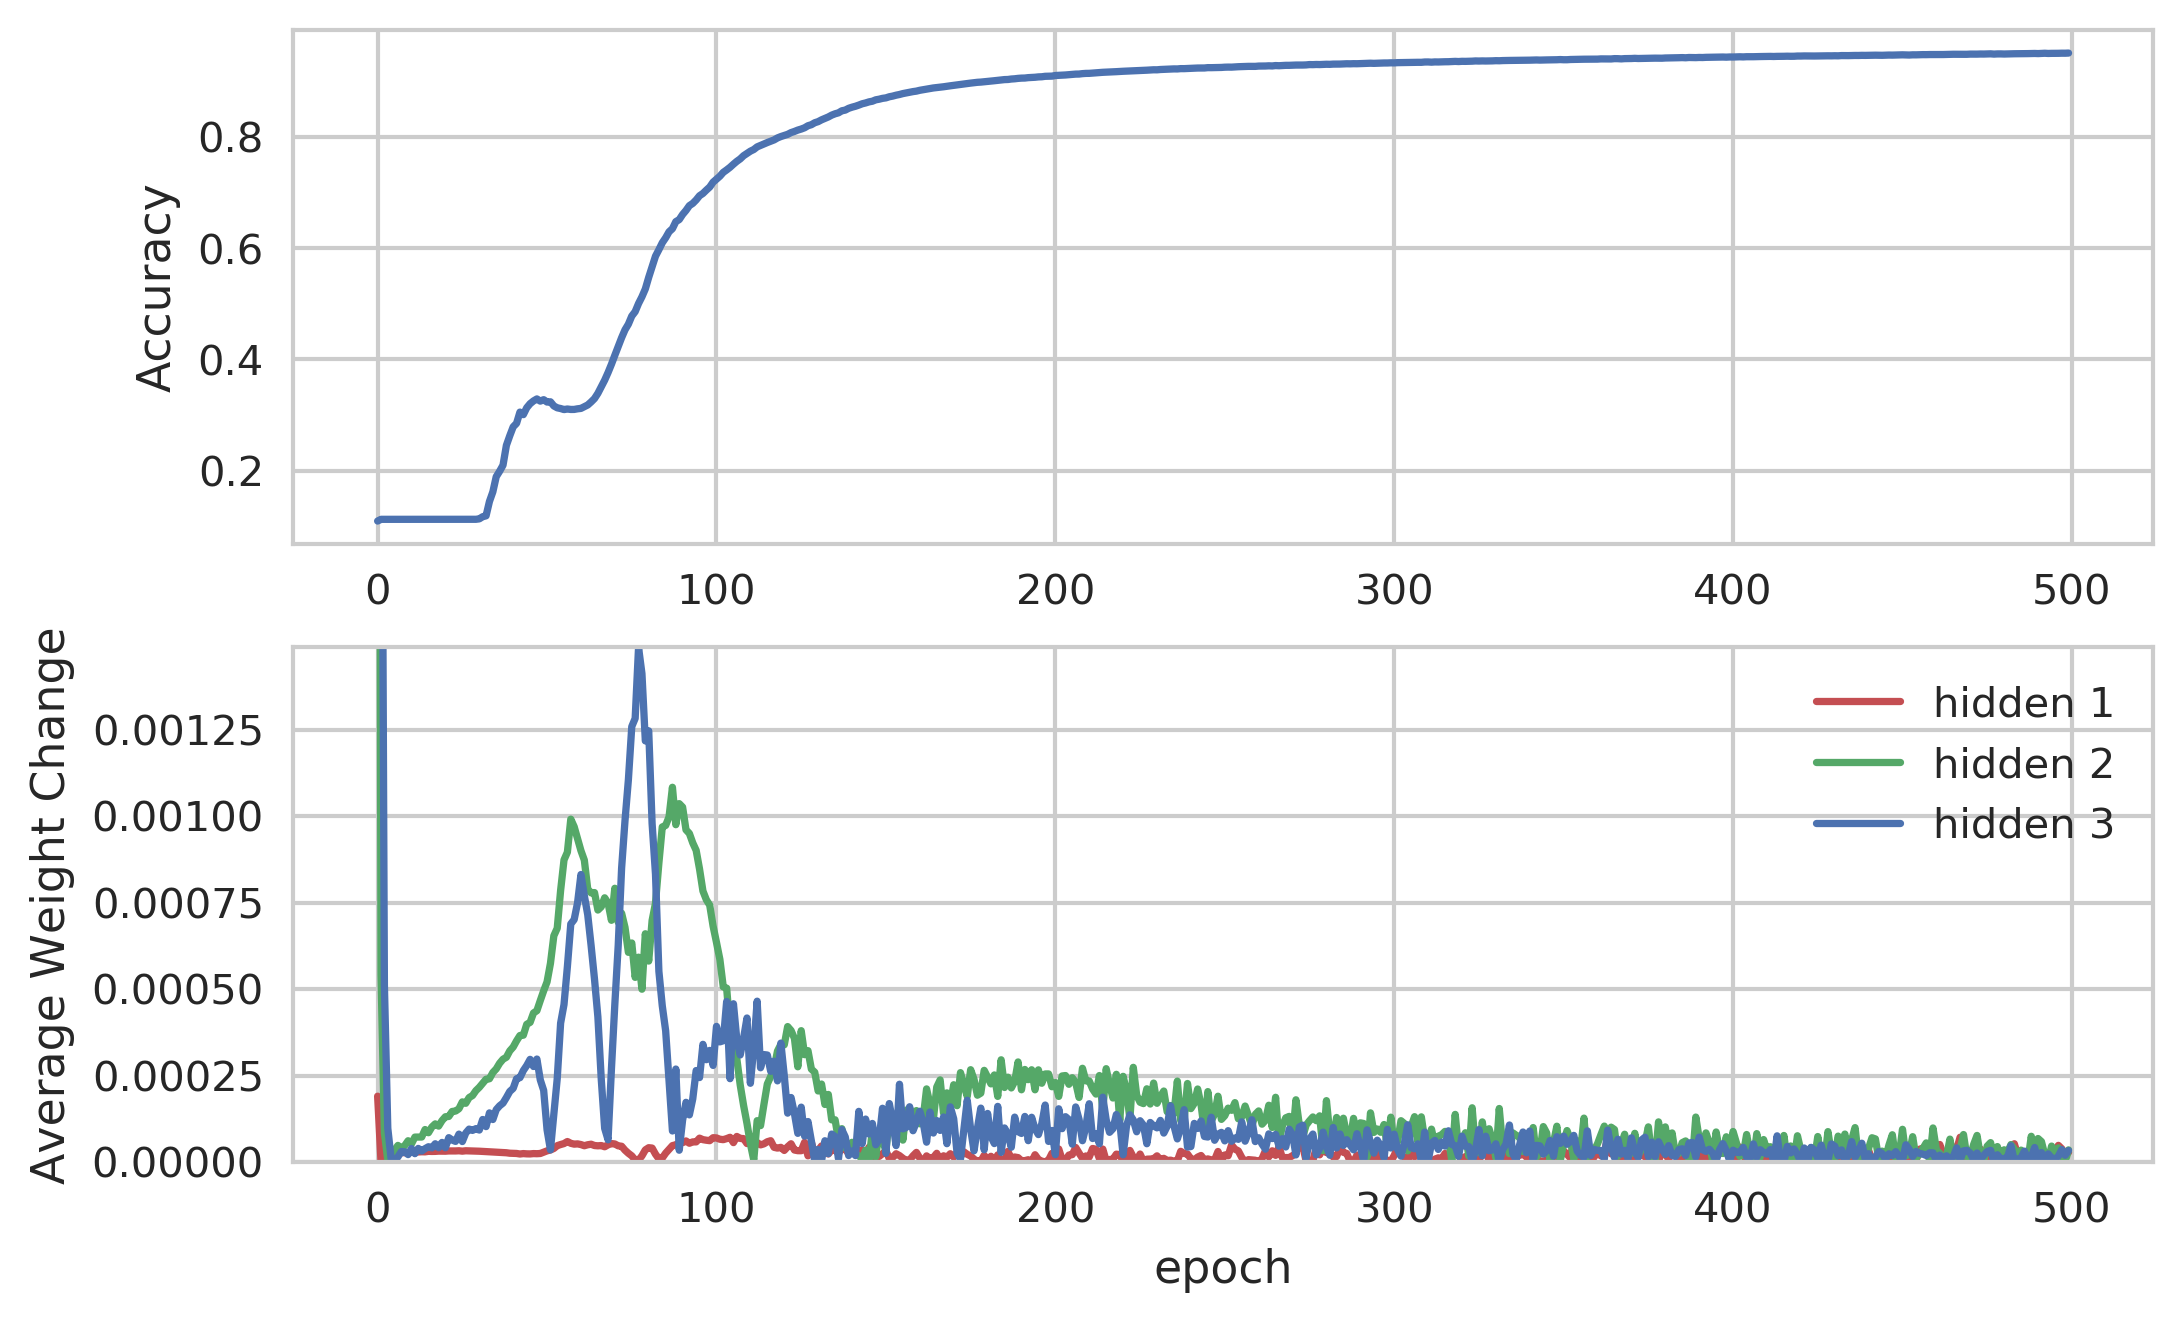

In [86]:
plt.subplot(2, 1, 1)
plt.plot(hist3.history['acc'])
plt.ylabel("Accuracy")
plt.subplot(2, 1, 2)
plt.plot(callback3.weight_change[0], 'r', label="hidden 1")
plt.plot(callback3.weight_change[1], 'g', label="hidden 2")
plt.plot(callback3.weight_change[2], 'b', label="hidden 3")
plt.xlabel("epoch")
plt.ylabel("Average Weight Change")
plt.ylim(0, np.max(callback3.weight_change[-1][5:]))
plt.legend()
plt.show()

In [97]:
hist3.history['acc'][-1]

0.9509166686733563

In [87]:
%%time
callback4 = WeightHistory(model4, num_epoch)
hist4 = model4.fit(X_train, Y_train, epochs=num_epoch, batch_size=100, callbacks=[callback4], verbose=0)

CPU times: user 31min 11s, sys: 3min 10s, total: 34min 21s
Wall time: 17min 26s


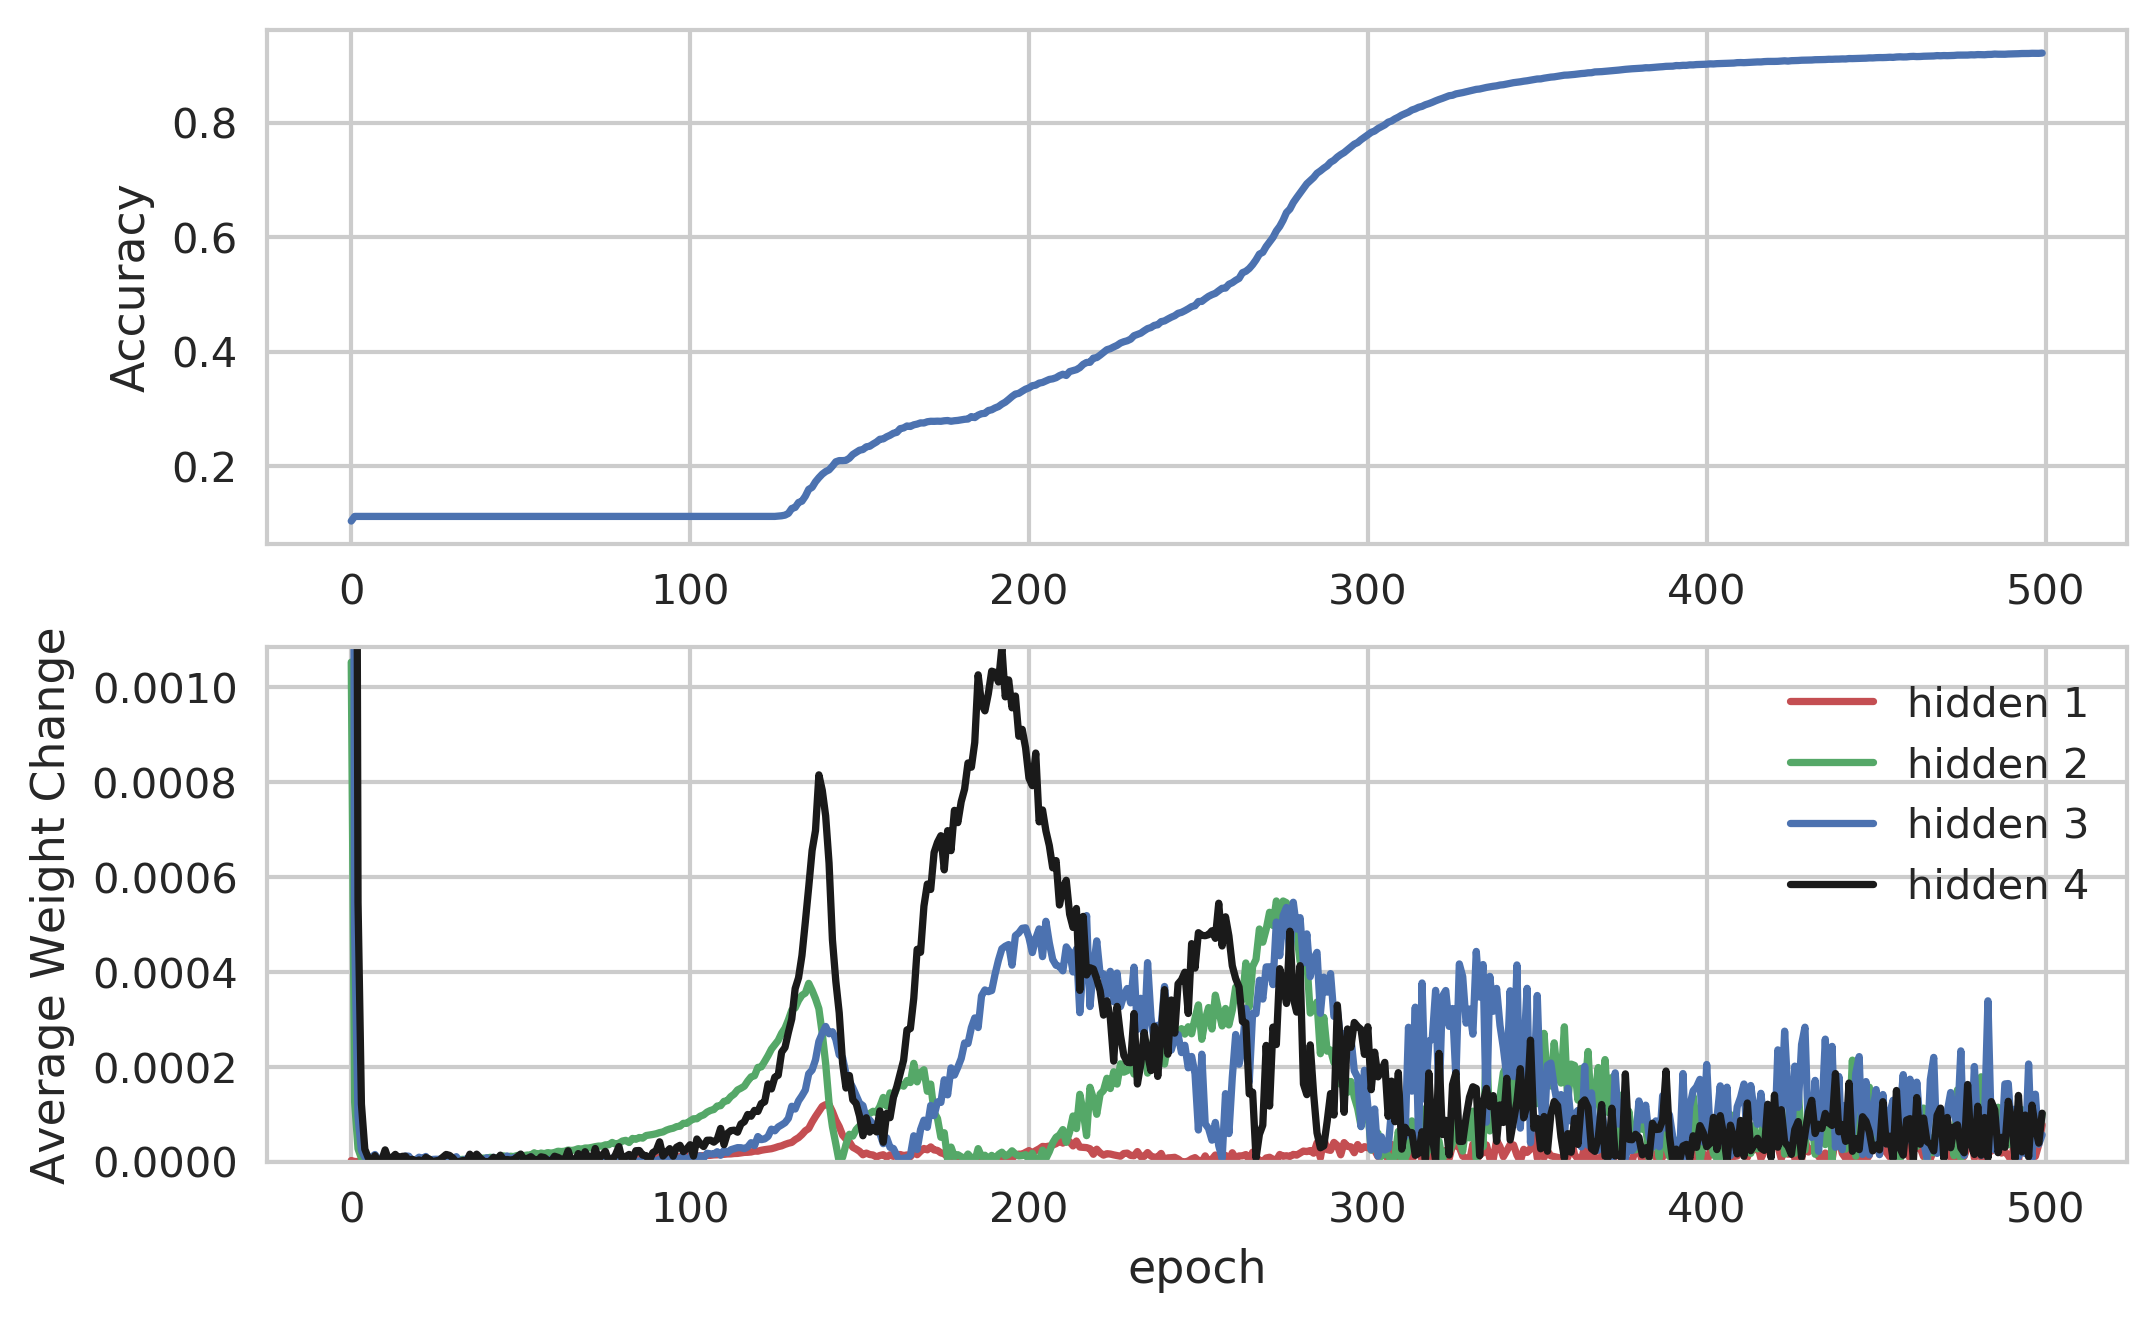

In [93]:
plt.subplot(2, 1, 1)
plt.plot(hist4.history['acc'])
plt.ylabel("Accuracy")
plt.subplot(2, 1, 2)
plt.plot(callback4.weight_change[0], 'r', label="hidden 1")
plt.plot(callback4.weight_change[1], 'g', label="hidden 2")
plt.plot(callback4.weight_change[2], 'b', label="hidden 3")
plt.plot(callback4.weight_change[3], 'k', label="hidden 4")
plt.xlabel("epoch")
plt.ylabel("Average Weight Change")
plt.ylim(0, np.max(callback4.weight_change[-1][5:]))
plt.legend()
plt.show()

In [96]:
hist4.history['acc'][-1]

0.92180000325044

## 기울기와 수렴 속도 문제

은닉 계층의 수가 너무 증가하면 수렴 속도 및 성능이 급격히 저하된다. 가중치가 감소하는 원인은 backpropagation시에 오차가 뉴런을 거치면서 activation 함수의 기울기가 곱해지는데 이 값이 1보다 작아서 계속 크기가 감소하기 때문이다. 

* sigmoid activation의 경우 

$$ \sigma'(0) = 1/4 $$

일반적으로 사용하는 잔차 제곱합(sum of square) 형태의 오차 함수는 대부분의 경우에 기울기 값이 0 이므로 (near-zero gradient) 수렴이 느려지는 단점이 있다.

$$
\begin{eqnarray}
z = \sigma (wx+b)
\end{eqnarray}
$$

$$
\begin{eqnarray}
  C = \frac{(y-z)^2}{2},
\end{eqnarray}
$$


$$
\begin{eqnarray} 
  \frac{\partial C}{\partial w} & = & (z-y)\sigma'(a) x \\
  \frac{\partial C}{\partial b} & = & (z-y)\sigma'(a)
\end{eqnarray}
$$


* if $x=1$, $y=0$, 
$$
\begin{eqnarray} 
  \frac{\partial C}{\partial w} & = & a \sigma'(a) \\
  \frac{\partial C}{\partial b} & = & a \sigma'(z)
\end{eqnarray}
$$

* $\sigma'$는 대부분의 경우에 zero.

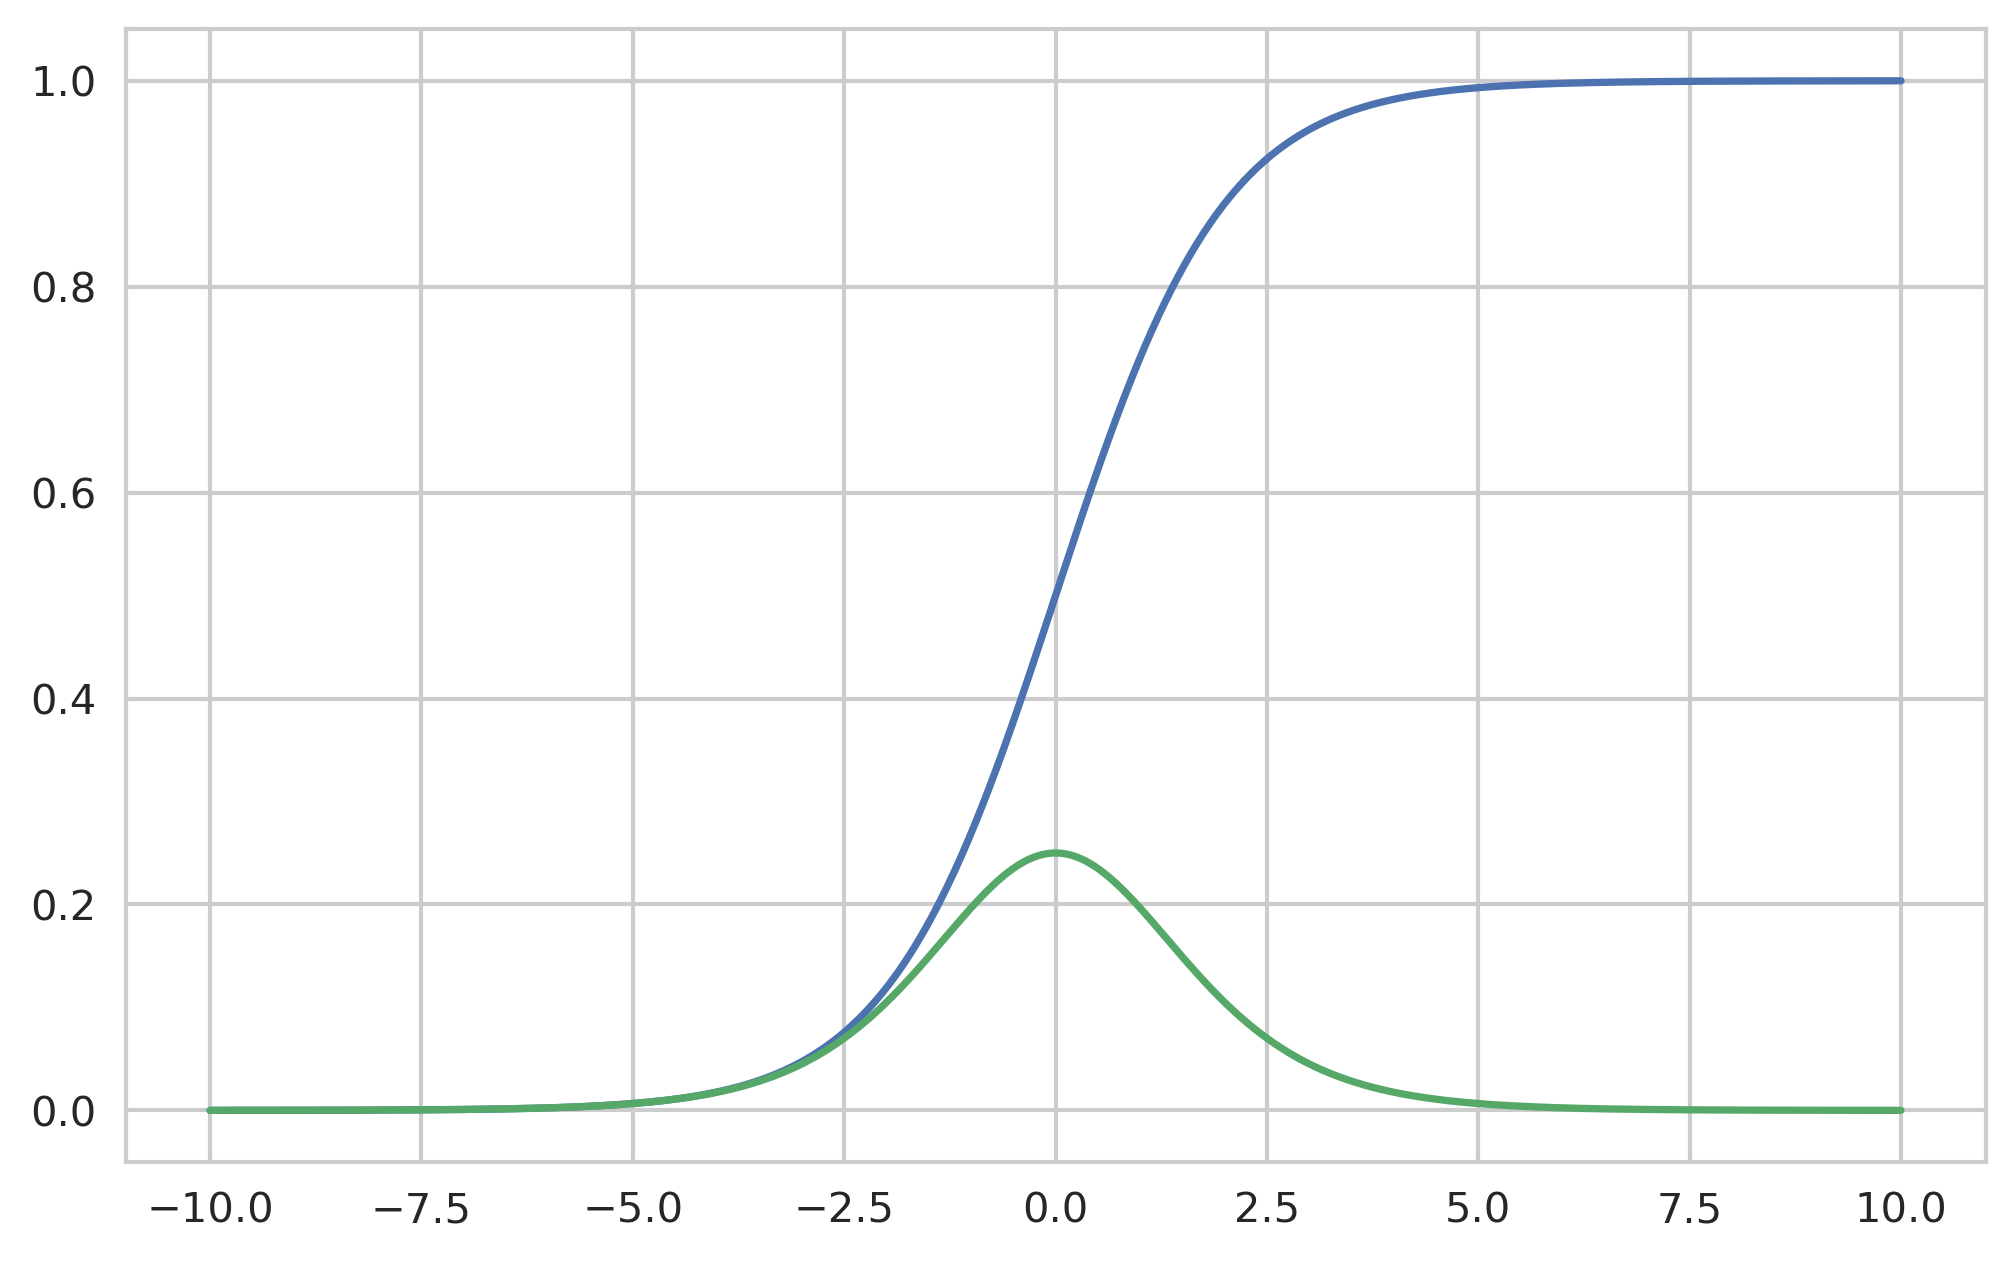

In [3]:
sigmoid = lambda x: 1/(1+np.exp(-x))
sigmoid_prime = lambda x: sigmoid(x)*(1-sigmoid(x))
xx = np.linspace(-10, 10, 1000)
plt.plot(xx, sigmoid(xx))
plt.plot(xx, sigmoid_prime(xx))
plt.show()